In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.cm as cm

In [3]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [6]:
from catboost import CatBoostClassifier

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1) Import Dataset (File Format CSV)

In [13]:
dataset = pd.read_csv("dataset.csv")

In [14]:
dataset.head(20)

,supervision_total,blackcard_total,ecommerce_total,order_count,total_price,city_id,gender,refund_fee,last_buytime,churn
0,0.0,0.0,3599.0,1,3599.0,101.0,NaN,0,1622509894,0
1,0.0,0.0,2399.0,1,2399.0,3201.0,NaN,0,1602734411,0
2,0.0,0.0,1116.0,1,1116.0,201.0,NaN,0,1622398317,0
3,0.0,0.0,499.0,1,499.0,3416.0,NaN,0,1600632002,0
4,0.0,0.0,4297.0,2,4297.0,3703.0,NaN,0,1623028263,0
5,0.0,0.0,548.0,1,548.0,101.0,NaN,0,1623705093,0
6,0.0,0.0,2969.0,1,2969.0,1310.0,NaN,0,1622772683,0
7,0.0,0.0,2199.0,1,2199.0,5001.0,NaN,0,1618182661,0
8,0.0,0.0,1000.0,1,1000.0,101.0,NaN,0,1620436280,0
9,0.0,0.0,11658.0,7,11658.0,201.0,NaN,0,1623370307,0


# 2) Date Cleaning

In [15]:
pd.isnull(dataset).sum()

supervision_total        0
blackcard_total          0
ecommerce_total          0
order_count              0
total_price              0
city_id                 22
gender               40371
refund_fee               0
last_buytime             0
churn                    0
dtype: int64

In [16]:
dataset['churn'].value_counts()

1    40282
0    12036
Name: churn, dtype: int64

##### Checking datatype

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52318 entries, 0 to 52317
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   supervision_total  52318 non-null  float64
 1   blackcard_total    52318 non-null  float64
 2   ecommerce_total    52318 non-null  float64
 3   order_count        52318 non-null  int64  
 4   total_price        52318 non-null  float64
 5   city_id            52296 non-null  float64
 6   gender             11947 non-null  float64
 7   refund_fee         52318 non-null  int64  
 8   last_buytime       52318 non-null  int64  
 9   churn              52318 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 4.0 MB


##### Dealing with missing value

In [18]:
dataset.dropna(inplace=True)
dataset.shape

(11930, 10)

In [19]:
dataset['churn'].value_counts()

1    6192
0    5738
Name: churn, dtype: int64

##### Casting datatype

In [20]:
dataset['city_id'] = dataset['city_id'].astype(int)

In [21]:
dataset['gender'] = dataset['gender'].astype(int)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11930 entries, 23 to 52317
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   supervision_total  11930 non-null  float64
 1   blackcard_total    11930 non-null  float64
 2   ecommerce_total    11930 non-null  float64
 3   order_count        11930 non-null  int64  
 4   total_price        11930 non-null  float64
 5   city_id            11930 non-null  int32  
 6   gender             11930 non-null  int32  
 7   refund_fee         11930 non-null  int64  
 8   last_buytime       11930 non-null  int64  
 9   churn              11930 non-null  int64  
dtypes: float64(4), int32(2), int64(4)
memory usage: 932.0 KB


##### Visualising propotion of customer churn

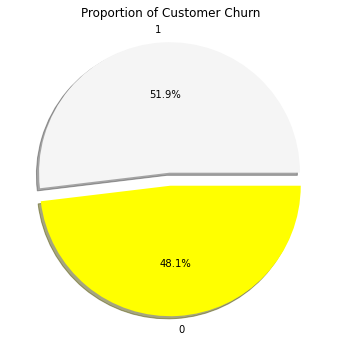

In [23]:
churnvalue=dataset['churn'].value_counts()
labels = dataset['churn'].value_counts().index

rcParams["figure.figsize"]=6,6
plt.pie(churnvalue,labels=labels,colors=["whitesmoke","yellow"],explode=(0.1,0),autopct='%1.1f%%',shadow=True)
plt.title("Proportion of Customer Churn")
plt.show()

In [24]:
charges=dataset.iloc[:,1:20]
corrDF = charges.apply(lambda x: pd.factorize(x)[0])
corrDF.head()

,blackcard_total,ecommerce_total,order_count,total_price,city_id,gender,refund_fee,last_buytime,churn
23,0,0,0,0,0,0,0,0,0
24,0,1,1,1,1,0,0,1,0
25,0,2,0,2,2,0,0,2,0
26,0,3,1,3,3,0,0,3,0
27,0,4,1,4,4,0,0,4,0


In [25]:
corr = corrDF.corr()
corr

,blackcard_total,ecommerce_total,order_count,total_price,city_id,gender,refund_fee,last_buytime,churn
blackcard_total,1.000000,0.135682,0.334479,0.380739,-0.126912,-0.037604,0.144279,0.321442,0.026621
ecommerce_total,0.135682,1.000000,0.167544,0.594913,-0.261172,0.059453,0.217130,0.567677,0.516236
order_count,0.334479,0.167544,1.000000,0.293922,0.034546,-0.037638,0.434001,0.129119,-0.225773
total_price,0.380739,0.594913,0.293922,1.000000,-0.199121,-0.022311,0.351975,0.732914,0.153523
city_id,-0.126912,-0.261172,0.034546,-0.199121,1.000000,0.034835,0.031803,-0.276953,-0.283925
gender,-0.037604,0.059453,-0.037638,-0.022311,0.034835,1.000000,-0.064119,0.011217,0.100211
refund_fee,0.144279,0.217130,0.434001,0.351975,0.031803,-0.064119,1.000000,0.251676,-0.244669
last_buytime,0.321442,0.567677,0.129119,0.732914,-0.276953,0.011217,0.251676,1.000000,0.348211
churn,0.026621,0.516236,-0.225773,0.153523,-0.283925,0.100211,-0.244669,0.348211,1.000000


Text(0.5, 1.0, 'Correlation between Variables')

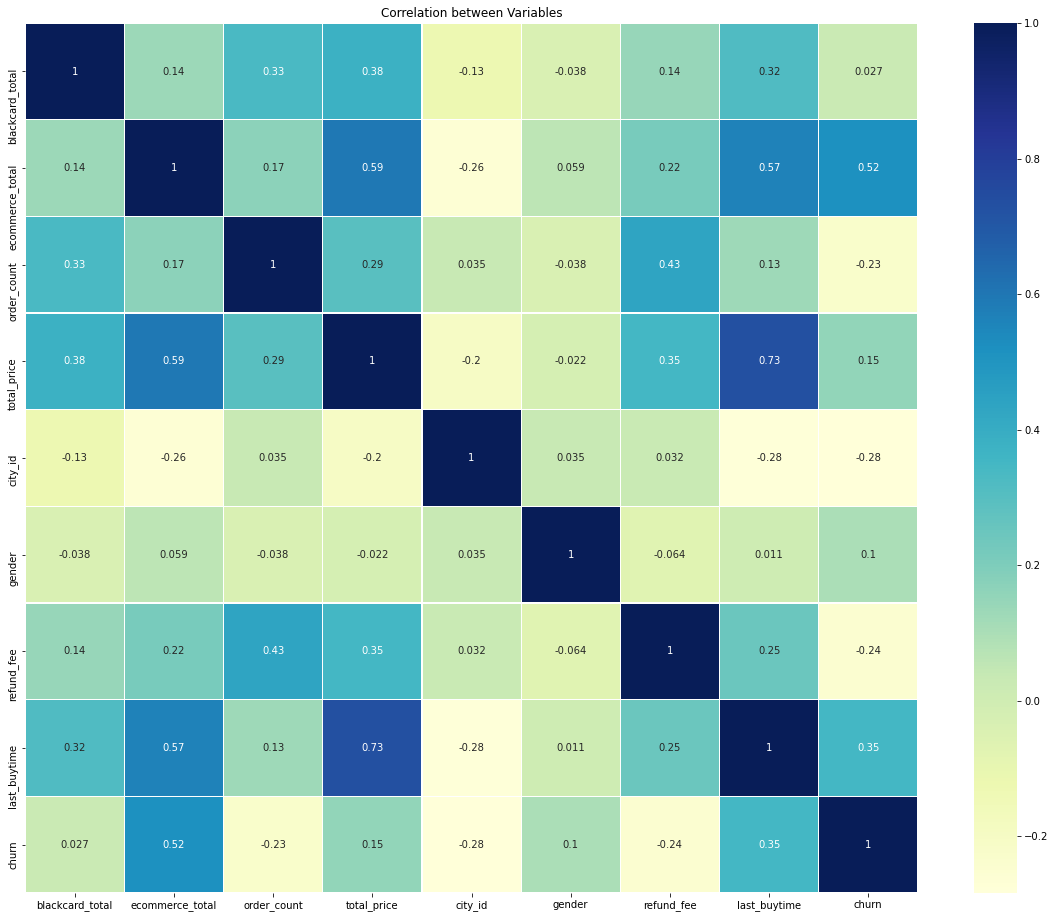

In [26]:
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr,xticklabels=corr.columns,linewidths=0.2,cmap="YlGnBu",annot=True)
plt.title("Correlation between Variables")

###### The result shows that there is relatively a strong correlation between (churn and total price), (refund_fee and ecommerce total)

In [27]:
churn_dummies = pd.get_dummies(dataset.iloc[:,1:20])
churn_dummies.head()

,blackcard_total,ecommerce_total,order_count,total_price,city_id,gender,refund_fee,last_buytime,churn
23,0.0,2427.0,3,2427.0,4401,2,0,1623787887,0
24,0.0,749.0,1,749.0,101,2,0,1620666677,0
25,0.0,5254.0,3,5254.0,1201,2,0,1617837117,0
26,0.0,10500.0,1,10500.0,5101,2,0,1607212813,0
27,0.0,3519.0,1,3519.0,4406,2,0,1620609076,0


Text(0.5, 1.0, 'Correlation between churn and variables')

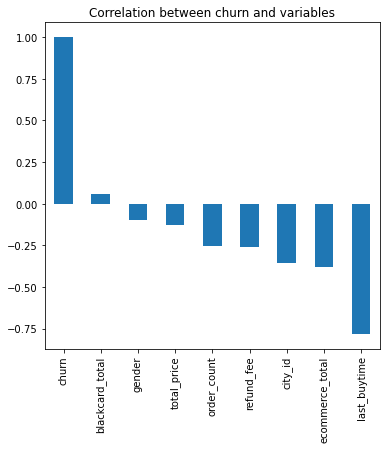

In [28]:
plt.figure(figsize=(6,6))
churn_dummies.corr()['churn'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation between churn and variables")

##### Since there is a low correlation between churn and gender, and to increase the size of dataset, the column 'gender' WILL BE REMOVED

In [29]:
dataset = pd.read_csv("dataset.csv")
dataset.drop('gender',axis=1,inplace=True)
dataset.head()

,supervision_total,blackcard_total,ecommerce_total,order_count,total_price,city_id,refund_fee,last_buytime,churn
0,0.0,0.0,3599.0,1,3599.0,101.0,0,1622509894,0
1,0.0,0.0,2399.0,1,2399.0,3201.0,0,1602734411,0
2,0.0,0.0,1116.0,1,1116.0,201.0,0,1622398317,0
3,0.0,0.0,499.0,1,499.0,3416.0,0,1600632002,0
4,0.0,0.0,4297.0,2,4297.0,3703.0,0,1623028263,0


In [30]:
scaler = StandardScaler(copy=False)
scaler.fit_transform(dataset[['supervision_total','blackcard_total',
                              'ecommerce_total','order_count','total_price',
                              'city_id','refund_fee','last_buytime']])

array([[-9.48019351e-01, -3.13648539e-01,  3.48346703e-01, ...,
        -7.61761162e-01, -1.82816367e-01,  1.30956422e+00],
       [-9.48019351e-01, -3.13648539e-01,  1.69033034e-01, ...,
         9.07028283e-01, -1.82816367e-01,  8.58006367e-01],
       [-9.48019351e-01, -3.13648539e-01, -2.26831626e-02, ...,
        -7.07929244e-01, -1.82816367e-01,  1.30701644e+00],
       ...,
       [ 8.93192894e-01,  2.89428433e+00, -1.89444874e-01, ...,
        -7.07929244e-01,  5.71459688e+00,  8.35121745e-01],
       [-7.74086729e-02,  7.93813108e-01,  2.88575480e-01, ...,
        -7.61761162e-01,  6.20354132e-01,  9.88524086e-01],
       [-2.50010284e-02,  4.77251128e-03, -4.00168172e-02, ...,
        -7.07929244e-01,  1.15580113e+00,  1.00382564e+00]])

In [31]:
dataset[['supervision_total','blackcard_total','ecommerce_total',
         'order_count','total_price','city_id',
         'refund_fee','last_buytime']]=scaler.transform(dataset[['supervision_total','blackcard_total','ecommerce_total',
                          'order_count','total_price','city_id',
                          'refund_fee','last_buytime']])

##### Checking Anomaly using boxplot

Text(0.5, 1.0, 'Check outlier of standardized variables')

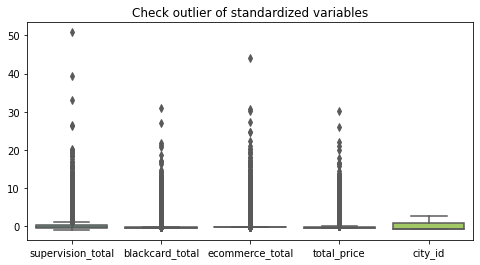

In [32]:
plt.figure(figsize=(8,4))
numbox = sns.boxplot(data=dataset[['supervision_total','blackcard_total','ecommerce_total','total_price','city_id']],palette='Set2')
plt.title("Check outlier of standardized variables")

In [33]:
dataset = SimpleImputer().fit_transform(dataset)

In [34]:
X = dataset[:,:-1]

In [35]:
Y = dataset[:,-1]

In [36]:
sss= StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
print(sss)
print("Number of Split Group: ",sss.get_n_splits(X,Y))

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
Number of Split Group:  5


In [37]:
for train_index, test_index in sss.split(X,Y):
    print('train: ', train_index, 'test: ',test_index)
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = Y[train_index],Y[test_index]

train:  [27518 25350 31239 ... 26746 31383  6500] test:  [49302 18267 17606 ...  7139  5775 34604]
train:  [ 1603 38461 12414 ... 40911 19855 48721] test:  [29050 29934 43014 ...   941 46615  3955]
train:  [30384 32239 49070 ...  3488 45979 30624] test:  [43636  2536 20470 ... 19075 33575  9731]
train:  [36389 38236 16139 ... 10872 17285 44487] test:  [29083 13002 40794 ... 16074 30882  8728]
train:  [20622 14637 35772 ... 34295 45231 17993] test:  [ 1963  4979  8548 ... 15161  9052  9424]


In [38]:
print("Original Dataset Feature: ",X.shape,
     "Training Dataset Featue: ",X_train.shape,
     "Testing Dataset Feature: ",X_test.shape)
print("Original label Feature: ",Y.shape,
     "Training label Featue: ",y_train.shape,
     "Testing label Feature: ",y_test.shape)

Original Dataset Feature:  (52318, 8) Training Dataset Featue:  (41854, 8) Testing Dataset Feature:  (10464, 8)
Original label Feature:  (52318,) Training label Featue:  (41854,) Testing label Feature:  (10464,)


# Fitting the model

In [39]:
Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             ["XGB", XGBClassifier()],
             ["CatBoost", CatBoostClassifier(logging_level='Silent')]  
]

In [40]:
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier=classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    class_eva=pd.DataFrame([recall,precision])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

[13:53:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
names=pd.DataFrame(names)
names=names[0].tolist()
names

['Random Forest',
 'Support Vector Machine',
 'LogisticRegression',
 'KNN',
 'Naive Bayes',
 'Decision Tree',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'XGB',
 'CatBoost']

In [42]:
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=["recall","precision"]
result
result

,Random Forest,Support Vector Machine,LogisticRegression,KNN,Naive Bayes,Decision Tree,AdaBoostClassifier,GradientBoostingClassifier,XGB,CatBoost
recall,0.997642,0.993298,0.985851,0.986471,0.986471,0.996525,0.997269,0.998262,0.997394,0.997766
precision,0.999006,0.990838,0.985973,0.987943,0.837425,0.998508,0.998385,0.998882,0.999005,0.997147


# Testing

In [43]:
pred_X = dataset[-20:,:-1]
pred_Y = dataset[-20:,-1]


model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
model.predict(pred_X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0.])

In [45]:
pred_Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [46]:
pred_X

array([[ 1.78039706e+00, -3.13648539e-01,  2.43597635e-01,
         5.62384499e-01, -7.04409420e-02,  1.87600280e+00,
         5.93046335e-01,  9.00999607e-01],
       [-9.48019351e-01, -3.13648539e-01,  6.81571270e-01,
         3.11537634e-01, -2.19039846e-01, -7.61761162e-01,
         3.52630632e-01,  8.24220594e-01],
       [-9.48019351e-01, -3.13648539e-01, -1.01730605e-01,
        -1.90156097e-01, -4.21365937e-01, -7.61761162e-01,
        -2.67335664e-02,  8.59651481e-01],
       [-2.74063078e-01, -3.13648539e-01, -1.40283043e-01,
         6.06907684e-02, -3.66673821e-01,  1.55408793e+00,
        -1.42925565e-01,  8.10000215e-01],
       [ 1.28298876e-01, -3.13648539e-01, -1.14730846e-01,
        -1.90156097e-01, -3.21476596e-01,  1.87600280e+00,
        -4.89546169e-02,  8.12302384e-01],
       [ 1.37682802e+00, -3.13648539e-01, -1.89444874e-01,
        -1.90156097e-01, -2.21008299e-01,  1.55301129e+00,
         2.04044090e-01,  5.20658533e-01],
       [ 2.96454829e+00, -3.136485

# Testing using new data

In [47]:
SupervisionTotal = input("Please Enter the total price from Supervision Department: ")
BlackcardTotal = input("Please Enter the total price from Blackcard Department: ")
EcommerceTotal = input("Please Enter the total price from Ecommerce Department: ")
OrderCount = input("Please Enter the total order number: ")
TotalPrice = input("Please Enter the total price: ")
CityID = input("Please Enter City ID: ")
refundFee = input("Please Enter total refund fee: ")
latestBuytime = input("Please Enter the lateset purchase timestamp: ")

Please Enter the total price from Supervision Department: 2000
Please Enter the total price from Blackcard Department: 1000
Please Enter the total price from Ecommerce Department: 0
Please Enter the total order number: 5
Please Enter the total price: 3000
Please Enter City ID: 0101
Please Enter total refund fee: 1200
Please Enter the lateset purchase timestamp: 1622509894


In [48]:
new=pd.DataFrame({'supervision_total':SupervisionTotal,'blackcard_total':BlackcardTotal,'ecommerce_total':EcommerceTotal,
                  'order_count':OrderCount,'total_price':TotalPrice,'city_id':CityID,
                  'refund_fee':refundFee,'last_buytime':latestBuytime},index=[1])

In [49]:
dataset = pd.read_csv("dataset.csv")
dataset.drop('gender',axis=1,inplace=True)
dataset=dataset.append(new,ignore_index=True)

In [50]:
dataset.tail(2)

,supervision_total,blackcard_total,ecommerce_total,order_count,total_price,city_id,refund_fee,last_buytime,churn
52317,2294,8000,1000,5,11294,201,5000,1609120407,1.0
52318,2000,1000,0,5,3000,0101,1200,1622509894,NaN


In [51]:
scaler = StandardScaler(copy=False)
dataset1=scaler.fit_transform(dataset[['supervision_total','blackcard_total','ecommerce_total',
                                       'order_count','total_price','city_id',
                                       'refund_fee','last_buytime']])

In [52]:
if model.predict([dataset1[-1]])==0:
    print("The user seems not likely to be churn user")
elif model.predict([dataset1[-1]])==1:
    print("The user is likely to be churn user")

The user seems not likely to be churn user
